In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('./hair_salon_data.xlsx')

In [3]:
df.head()

,Age,Gender,Visit_Frequency,Service_Type,Average_Spend_Per_Visit,Total_Spend,Loyalty_Program,Promotional_Response,Feedback_Score,Age_Group,Visit_Frequency_Group,Customer_Value,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,56,Female,3,Haircut,56.36,741.17,Yes,No,3,Middle Age,Rare Visitors,High,3,1,3,7
1,69,Male,1,Treatment,37.41,300.87,No,No,2,Senior,Rare Visitors,Medium,3,1,2,6
2,46,Male,5,Hair Coloring,53.90,16.39,No,Yes,5,Middle Age,Occasional Visitors,Low,2,2,1,5
3,32,Female,4,Hair Coloring,46.83,528.59,No,Yes,4,Adult,Rare Visitors,Medium,3,1,3,7
4,60,Male,10,Haircut,49.17,138.68,No,Yes,3,Middle Age,Frequent Visitors,Low,1,3,1,5


In [7]:
data = df.copy()

In [19]:
data

,Age,Gender,Visit_Frequency,Service_Type,Average_Spend_Per_Visit,Total_Spend,Loyalty_Program,Promotional_Response,Feedback_Score,Age_Group,Visit_Frequency_Group,Customer_Value
0,56,Female,3,Haircut,56.36,741.17,Yes,No,3,Middle Age,Rare Visitors,High
1,69,Male,1,Treatment,37.41,300.87,No,No,2,Senior,Rare Visitors,Medium
2,46,Male,5,Hair Coloring,53.90,16.39,No,Yes,5,Middle Age,Occasional Visitors,Low
3,32,Female,4,Hair Coloring,46.83,528.59,No,Yes,4,Adult,Rare Visitors,Medium
4,60,Male,10,Haircut,49.17,138.68,No,Yes,3,Middle Age,Frequent Visitors,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
479,65,Male,7,Styling,35.39,422.39,No,No,5,Senior,Occasional Visitors,Medium
480,42,Female,5,Haircut,46.04,365.14,No,No,3,Adult,Occasional Visitors,Medium
481,57,Female,3,Haircut,42.40,401.85,No,Yes,1,Middle Age,Rare Visitors,Medium
482,62,Male,3,Haircut,48.25,101.22,No,Yes,3,Senior,Rare Visitors,Low


In [13]:
data.describe()

,Age,Visit_Frequency,Average_Spend_Per_Visit,Total_Spend,Feedback_Score,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
count,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000
mean,44.320248,6.274793,49.956694,311.128079,3.103306,2.055785,1.944215,2.002066,6.002066
std,15.006787,3.356787,20.468521,209.374518,1.403069,0.795294,0.795294,0.817761,0.817761
min,18.000000,1.000000,0.630000,6.660000,1.000000,1.000000,1.000000,1.000000,5.000000
25%,32.000000,3.000000,36.450000,150.290000,2.000000,1.000000,1.000000,1.000000,5.000000
50%,45.000000,6.000000,50.485000,269.800000,3.000000,2.000000,2.000000,2.000000,6.000000
75%,57.000000,9.000000,64.692500,446.680000,4.000000,3.000000,3.000000,3.000000,7.000000
max,69.000000,12.000000,102.580000,881.690000,5.000000,3.000000,3.000000,3.000000,7.000000


In [18]:
data.drop(columns=['Recency_Score', 'Frequency_Score', 'Monetary_Score', 'RFM_Score'], inplace=True)

KeyError: "['Recency_Score', 'Frequency_Score', 'Monetary_Score', 'RFM_Score'] not found in axis"

Model: LogisticRegression, Cross-Validation Accuracy: 0.246
Model: RandomForest, Cross-Validation Accuracy: 0.200
Model: GradientBoosting, Cross-Validation Accuracy: 0.216


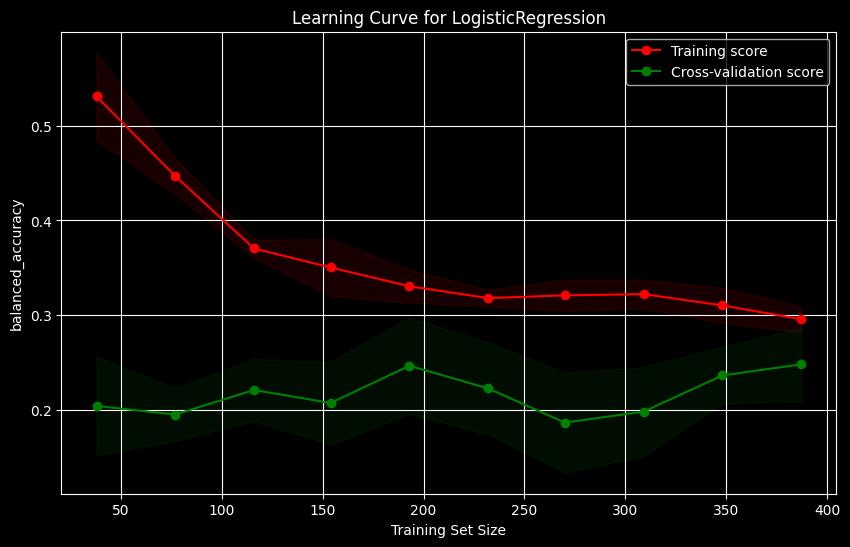

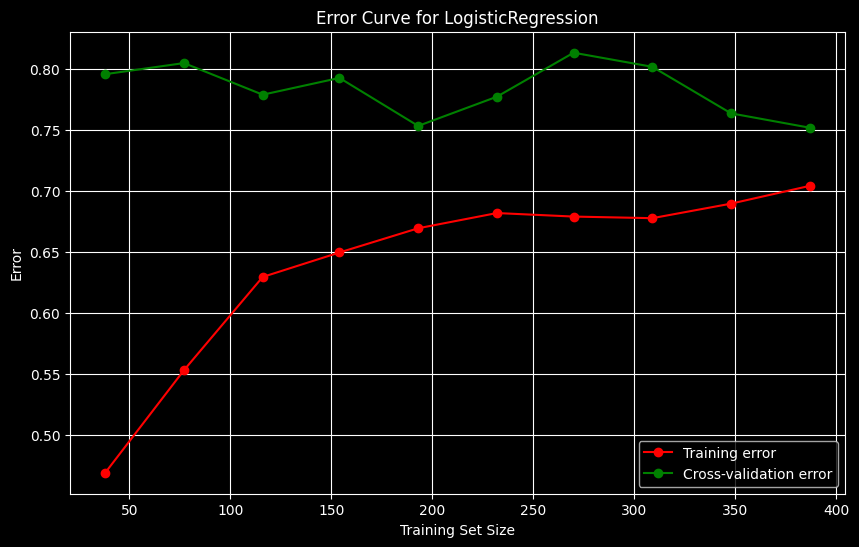

              precision    recall  f1-score   support

           1       0.40      0.12      0.19        16
           2       0.25      0.30      0.27        20
           3       0.19      0.16      0.17        19
           4       0.21      0.24      0.22        21
           5       0.25      0.33      0.29        21

    accuracy                           0.24        97
   macro avg       0.26      0.23      0.23        97
weighted avg       0.25      0.24      0.23        97

Best Model: LogisticRegression with Cross-Validation Accuracy: 0.246


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, scoring='balanced_accuracy'):
    # Generate learning curve data
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    # Compute mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
    
    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel(scoring)
    plt.grid()

    # Plot training score
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

    # Plot validation score
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

def plot_error_curve(estimator, X, y, title="Error Curve", cv=5, scoring='balanced_accuracy'):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    # Compute errors
    train_errors = 1 - np.mean(train_scores, axis=1)
    val_errors = 1 - np.mean(val_scores, axis=1)

    # Plot error curve
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Error")
    plt.grid()

    plt.plot(train_sizes, train_errors, 'o-', color="r", label="Training error")
    plt.plot(train_sizes, val_errors, 'o-', color="g", label="Cross-validation error")
    
    plt.legend(loc="best")
    plt.show()

def get_feature_names(preprocessor, feature_selector, k):
    # Extract numerical feature names
    num_features = preprocessor.named_transformers_['num']['scaler'].get_feature_names_out()
    
    # Extract categorical feature names after one-hot encoding
    cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out()
    
    # Combine all feature names
    all_features = np.concatenate([num_features, cat_features])
    
    # Get the indices of features selected by SelectKBest
    selected_indices = feature_selector.get_support(indices=True)
    
    # Map the selected indices to the actual feature names
    selected_features = all_features[selected_indices]
    
    return selected_features



def get_feature_importances(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_).ravel()
    else:
        raise ValueError("The model does not support feature importance extraction.")
    
    if len(feature_names) != len(importances):
        raise ValueError(f"Mismatch in feature names ({len(feature_names)}) and importances ({len(importances)}).")
    
    return pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)




def plot_feature_importance(feature_importance_df, top_n=10):
    # Select top N features
    top_features = feature_importance_df.head(top_n)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=top_features, 
        x='Importance', 
        y='Feature', 
        palette='viridis'
    )
    plt.title('Top Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()



# Assuming `data` is your DataFrame
# Step 3: Split Data into Features and Target
X = data.drop(columns=['Feedback_Score'])
y = data['Feedback_Score']  # Ensure `y` is categorical
y = y.astype('category')  # Explicitly treat as categorical


# Step 4: Preprocessing Pipeline
numeric_features = ['Age', 'Visit_Frequency', 'Average_Spend_Per_Visit', 'Total_Spend']
categorical_features = ['Gender', 'Service_Type', 'Loyalty_Program', 'Promotional_Response', 
                        'Age_Group', 'Visit_Frequency_Group', 'Customer_Value']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 5: Combined Feature Selection and Modeling
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

# Cross-validation results
best_model = None
best_score = float('-inf')

k = min(24, X.shape[1])  # Ensure k doesn't exceed the number of features


for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(score_func=f_classif, k=k)),
        ('model', model)
    ])
    
    # Perform cross-validation directly on the pipeline
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='balanced_accuracy')
    mean_score = np.mean(scores)
    
    print(f"Model: {name}, Cross-Validation Accuracy: {mean_score:.3f}")
    
    if mean_score > best_score:
        best_score = mean_score
        best_model = (name, pipeline)

# Step 6: Train Final Model on Entire Training Data
final_model_name, final_pipeline = best_model


# Plot the learning curve
plot_learning_curve(final_pipeline, X, y, title=f"Learning Curve for {final_model_name}")
# Plot error curve
plot_error_curve(final_pipeline, X, y, title=f"Error Curve for {final_model_name}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
final_pipeline.fit(X_train, y_train)
# Get preprocessor and feature selector from the final pipeline
#preprocessor = final_pipeline.named_steps['preprocessor']
#feature_selector = final_pipeline.named_steps['feature_selection']
#model = final_pipeline.named_steps['model']

# Extract feature names
#selected_features = get_feature_names(preprocessor, feature_selector, k=k)

# Get feature importances
#feature_importance_df = get_feature_importances(model, selected_features)

# Plot top 10 features
#plot_feature_importance(feature_importance_df, top_n=10)

print(classification_report(y_test, final_pipeline.predict(X_test)))

# Save the model
joblib.dump(final_pipeline, f'{final_model_name}_Feedback_Score_model.pkl')

print(f"Best Model: {final_model_name} with Cross-Validation Accuracy: {best_score:.3f}")


/tmp/ipykernel_1510/3583153102.py:141: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(y):


Model: LogisticRegression, Cross-Validation Balanced Accuracy: 0.497
Model: RandomForest, Cross-Validation Balanced Accuracy: 0.487
Model: GradientBoosting, Cross-Validation Balanced Accuracy: 0.479


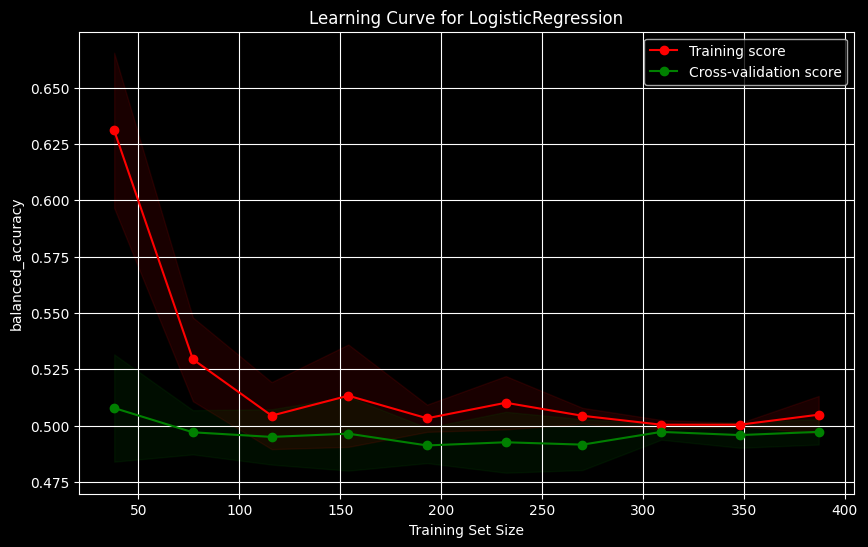

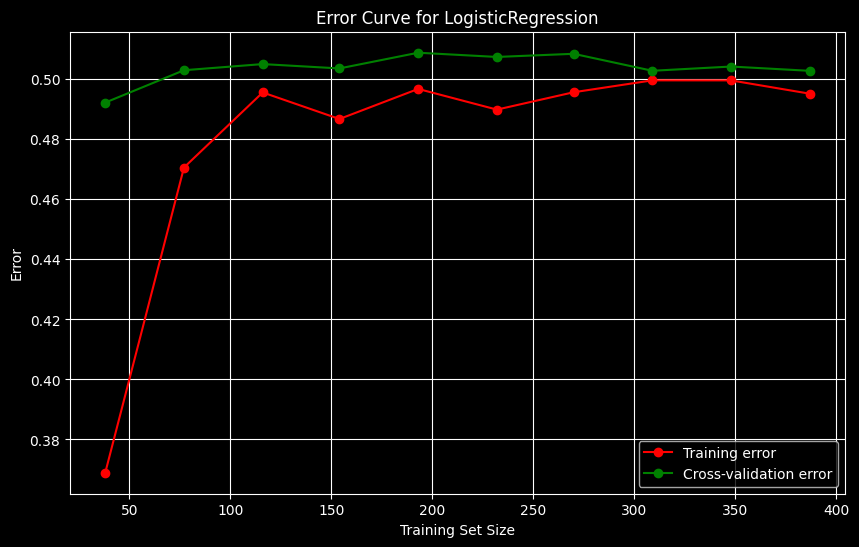

/tmp/ipykernel_1510/3583153102.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


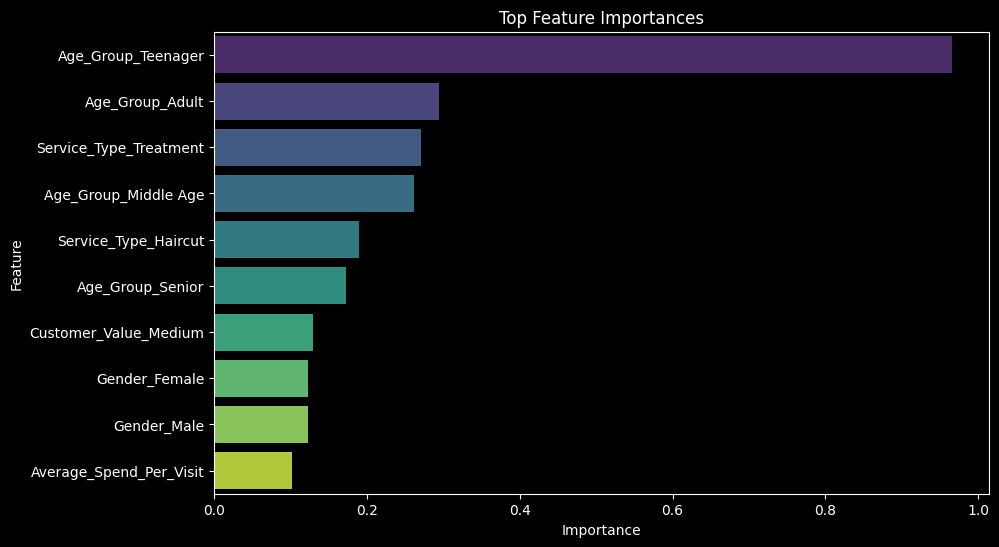


Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.73      0.99      0.84        71
           1       0.00      0.00      0.00        26

    accuracy                           0.72        97
   macro avg       0.36      0.49      0.42        97
weighted avg       0.53      0.72      0.61        97

Best Model: LogisticRegression with Cross-Validation Balanced Accuracy: 0.497


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif
import joblib

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, scoring='balanced_accuracy'):
    # Generate learning curve data
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    # Compute mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
    
    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel(scoring)
    plt.grid()

    # Plot training score
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

    # Plot validation score
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

def plot_error_curve(estimator, X, y, title="Error Curve", cv=5, scoring='balanced_accuracy'):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    # Compute errors
    train_errors = 1 - np.mean(train_scores, axis=1)
    val_errors = 1 - np.mean(val_scores, axis=1)

    # Plot error curve
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Error")
    plt.grid()

    plt.plot(train_sizes, train_errors, 'o-', color="r", label="Training error")
    plt.plot(train_sizes, val_errors, 'o-', color="g", label="Cross-validation error")
    
    plt.legend(loc="best")
    plt.show()


def get_feature_names(preprocessor, feature_selector, k):
    # Get numerical feature names
    num_features = preprocessor.named_transformers_['num']['scaler'].get_feature_names_out()
    
    # Get categorical feature names
    cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out()
    
    # Combine numerical and categorical features
    all_features = np.concatenate([num_features, cat_features])
    
    # Select features based on SelectKBest
    selected_features = all_features[feature_selector.get_support()]
    
    return selected_features[:k]  # Limit to k features selected


def get_feature_importances(model, feature_names):
    # Handle models with feature importance
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_).ravel()
    else:
        raise ValueError("The model does not support feature importance extraction.")
    
    # Combine feature names and their importance
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    
    return feature_importance_df.sort_values(by='Importance', ascending=False)



def plot_feature_importance(feature_importance_df, top_n=10):
    # Select top N features
    top_features = feature_importance_df.head(top_n)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=top_features, 
        x='Importance', 
        y='Feature', 
        palette='viridis'
    )
    plt.title('Top Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()








# Assuming `data` is your DataFrame
# Step 1: Sanity Check for DataFrame
required_columns = ['Promotional_Response', 'Age', 'Visit_Frequency', 'Average_Spend_Per_Visit',
                    'Total_Spend', 'Gender', 'Service_Type', 'Loyalty_Program', 
                    'Age_Group', 'Visit_Frequency_Group', 'Customer_Value']

if not all(col in data.columns for col in required_columns):
    raise ValueError("DataFrame is missing required columns.")

# Step 2: Split Data into Features and Target
X = data.drop(columns=['Promotional_Response'])
y = data['Promotional_Response']  # Ensure `y` is binary
if not pd.api.types.is_categorical_dtype(y):
    y = y.astype('category').cat.codes  # Convert to numeric categories if necessary

# Step 3: Preprocessing Pipeline
numeric_features = ['Age', 'Visit_Frequency', 'Average_Spend_Per_Visit', 'Total_Spend']
categorical_features = ['Gender', 'Service_Type', 'Loyalty_Program', 
                        'Age_Group', 'Visit_Frequency_Group', 'Customer_Value']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 4: Combined Feature Selection and Modeling
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

# Cross-validation results
best_model = None
best_score = float('-inf')

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(score_func=f_classif, k=min(24, X.shape[1]))),
        ('model', model)
    ])
    
    # Perform cross-validation directly on the pipeline
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='balanced_accuracy')
    mean_score = np.mean(scores)
    
    print(f"Model: {name}, Cross-Validation Balanced Accuracy: {mean_score:.3f}")
    
    if mean_score > best_score:
        best_score = mean_score
        best_model = (name, pipeline)

# Step 5: Train Final Model on Training Data
final_model_name, final_pipeline = best_model



# Plot the learning curve
plot_learning_curve(final_pipeline, X, y, title=f"Learning Curve for {final_model_name}")

# Plot error curve
plot_error_curve(final_pipeline, X, y, title=f"Error Curve for {final_model_name}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
final_pipeline.fit(X_train, y_train)

# Get preprocessor and feature selector from the final pipeline
preprocessor = final_pipeline.named_steps['preprocessor']
feature_selector = final_pipeline.named_steps['feature_selection']
model = final_pipeline.named_steps['model']

# Extract feature names
selected_features = get_feature_names(preprocessor, feature_selector, k=k)

# Get feature importances
feature_importance_df = get_feature_importances(model, selected_features)

# Plot top 10 features
plot_feature_importance(feature_importance_df, top_n=10)

# Step 6: Evaluate the Model
y_pred = final_pipeline.predict(X_test)
print(f"\nClassification Report for {final_model_name}:")
print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(final_pipeline, f'{final_model_name}_Promotional_Response_model.pkl')

print(f"Best Model: {final_model_name} with Cross-Validation Balanced Accuracy: {best_score:.3f}")
